Preamble: Dependencies
==============

NumPy and Matplotlib are Python Libraries that are widely used in scientific computing and data visualisation.

In [ ]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

The `audio` package is a collection of Python modules that I have developped for this course:

  - use `audio.wave` to read/write WAVE files,
  
  - use `audio.io` to play/record sound data,
  
  - use `audio.bitstream` to read/write binary data.

In [38]:
import audio.io
import audio.wave
from audio.bitstream import BitStream

Synthesis of Pure Tones
============

In [1]:
df = 44100.0
dt = 1.0 / df
f = 440.0
T = 3.0

In [7]:
t = r_[0.0:T:dt] # see also: arange, linspace, etc.
t[-1] # the last value (T) is excluded

2.9999773242630385

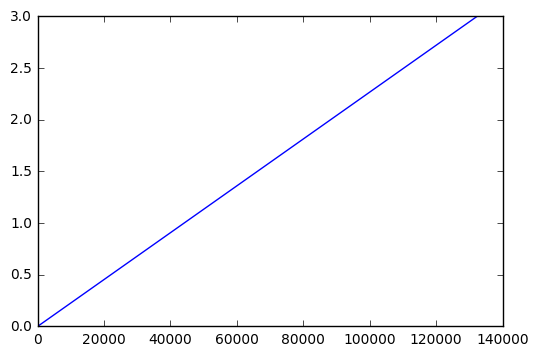

In [8]:
plot(t)

In [9]:
A4 = cos(2*pi*f*t)


In [11]:
audio.io.play(A4)

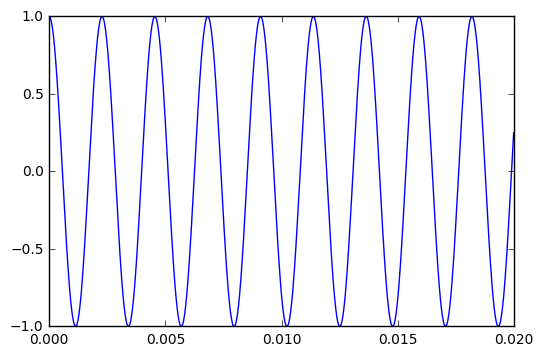

In [13]:
ts = t[t<20.0/1000.0] # 20 ms 
A4s = A4[t<20.0/1000.0]
plot(ts, A4s)

In [17]:
def make_tone(symbol):
    number = int(symbol[1:])
    f = 27.5 * 2 ** number
    x = cos(2*pi*f*t)
    audio.wave.write(x, symbol + ".wav")
    return x
    

In [20]:
A8 = make_tone("A8")
audio.io.play(A8)

In [21]:
A = []
for i in range(0,11):
    symbol = "A" + str(i)
    A.append(make_tone(symbol))

In [24]:
for i, sound in enumerate(A):
    print "A" + str(i)
    audio.io.play(sound)

A0
A1
A2
A3
A4
A5
A6
A7
A8
A9
A10


In [25]:
27.5 * 2**10


28160.0

In [26]:
audio.io.play(A[10])

In [27]:
for sound in A:
    print mean(sound*sound)

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


In [30]:
def L(x):
    return 96.0 + 10.0 * log10(mean(x*x))

In [31]:
L(A[4])

92.989700043360187

WAVE Format Header Analysis
================

In [33]:
audio.io.play(A[4])

In [34]:
audio.io.play(A[4], df=16000)

Wave format documentation: <http://soundfile.sapp.org/doc/WaveFormat/>

In [36]:
raw = open("A4.wav").read() # raw is a 'str' (string)
print raw[:4], raw[8:12]


RIFF WAVE


In [39]:
raw = open("A4.wav").read()
stream = BitStream(raw)
print stream.read(str, 4)
_ = stream.read(str, 4)
print stream.read(str, 4)

RIFF
WAVE


In [44]:
raw = open("A4.wav").read()
stream = BitStream(raw)
_ = stream.read(str, 22)
print stream.read(uint16).newbyteorder() # 2-byte integer (little end.)
print stream.read(uint32).newbyteorder() # 4-byte integer (little end.)

1
44100


Quantization and Signal-to-Noise Ratio
=====================

In [45]:
A4q = audio.wave.read("A4.wav")
e = A4 - A4q
SNR = sqrt(mean(A4*A4) / mean(e * e))
print SNR

77863.1828913


In [46]:
print 20.0 * log10(SNR) # SNR in dB

97.8266430567
